In [115]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from operator import add
from functools import reduce

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size': 15})

In [162]:
def true_model(x):
    gausses = [[0, 0.5, 1], [2, 0.3, 0.5], [4, 0.3, 0.2]]
    return reduce(add, [gauss[2] * np.exp(-(x - gauss[0]) ** 2 / gauss[1]) for gauss in gausses])
def noisy_model(x):
    #return true_model(x) + np.random.normal(0, 0.1, np.shape(x))
    return np.random.poisson(true_model(x) * 30) / 30

In [171]:
x = np.arange(-2, 6, 0.05)
y = true_model(x)
yn = noisy_model(x)

In [172]:
yc = scipy.signal.convolve(yn, np.ones(30) / 30., mode="same")

In [173]:
ys = scipy.signal.savgol_filter(yn, 31, 3)

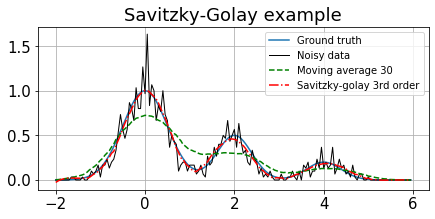

In [174]:
plt.subplots(figsize=(7,3))
plt.plot(x, y, label="Ground truth")
plt.plot(x, yn, 'k', linewidth=1, label="Noisy data")
plt.plot(x, yc, "--g", label="Moving average 30")
plt.plot(x, ys, "-.r", label="Savitzky-golay 3rd order")
plt.grid()
plt.legend(fontsize=10)
plt.title("Savitzky-Golay example")
plt.savefig("../statistics/images/savgol-example.pdf")

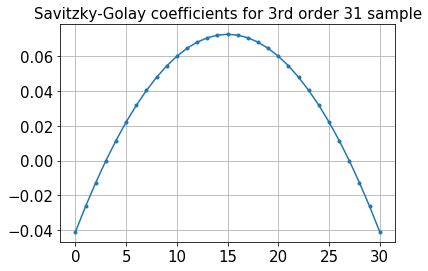

In [133]:
plt.plot(scipy.signal.savgol_coeffs(31, 3), ".-")
plt.grid()
plt.title("Savitzky-Golay coefficients for 3rd order 31 sample", fontsize=15)
plt.savefig("../statistics/images/savgol-coeffs.pdf")